# EASC 3170 Gravity Modelling Lab

### This lab is designed to give you hands on experience with forward modelling of gravity data using simple shapes.

#### Data: 

During this lab, you will calculate gravity response of simple shapes to try and achieve a gravity profile that looks similar to the gravity profile acquired across strike of the Valentine Lake gold deposit.

The Valentine Lake gravity profile is provided in your work folder.

#### Lab Workflow:

You will complete this lab using a series of python commands within this notebook that will allow you to calculate gravity data using simple shapes.

Don't worry if you have no experience with python programming! You will not be doing any intensive programming during this lab. 

All you need to do is fill in the blanks where specified within the python code already provided to you for doing gravity corrections.

## First, let's import the python notebooks and modules that we'll be using today.

In [1]:
%run GravityImports.py
#%run GravityImports.py
%matplotlib inline
import pandas as pd

## Part 1 - For the first example, lets have a look at calculating a gravity profile for a sphere.

In [2]:
# Provide the location of the center of the spherical density source in meters

xq = 0
yq = 0
zq = -800

xsrc = [xq, yq, zq]

#this sets up the range of observations, it means that you have a data point starting at 
#-2000 m, continuing to 2000 m, with 1000 points.  You may change this, and I encourage you to 
#do so, but the more points you use (the third number), the longer it will take to compute.
obs_range = np.linspace(-2500,2500,1000) 

# Set the density and radius of the sphere in meters

rho = -2000 # kg/m^3 density CONTRAST
src_radius = 500

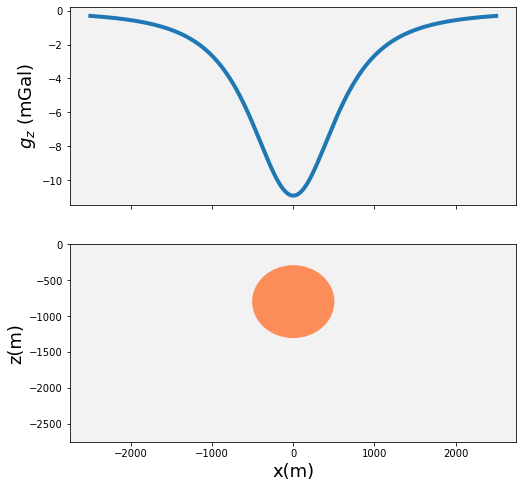

In [3]:
plot_gravity_profile(xq, yq, zq, src_radius, rho,obs_range)

## Now plot the parameters you extract for the tables in questions 1.2 and 1.4

<font size="3">You can use this cell to do the plotting and fitting of various parameters.  First enter the parameters you read from your graph for different cells and then fit the data, and plot the resulting fit on the same graph.  The cell below does a linear fit, and the following cell does a log plot and a power-law fit.  Simply put in your values for x and y and then the code will do the rest.  If you want to do this multiple times for different sets of data you record, simply copy and paste the cell using the buttons above and then change x and y to whatever you want them to be. Note that you may also do this part of the lab in excel if you are more comfortable with that.<font>

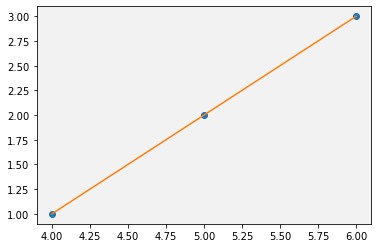

yfit=1.00x-3.00


In [4]:
y=[1,2,3]
x=[4,5,6]

p=np.polyfit(x,y,1)

yfit=p[0]*np.asarray(x)+p[1]

plt.figure()
plt.plot(x,y,'o',x,yfit)

plt.show()
print('yfit='+str('%1.2f'%p[0])+'x' + str('%1.2f' % p[1]))

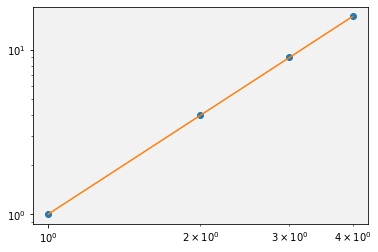

yfit=10^-0.00x^2.00


In [5]:
y=[1,4,9,16]
x=[1,2,3,4]

x_proc=np.log10(x)
y_proc=np.log10(y)

p=np.polyfit(x_proc,y_proc,1)

yfit=10**p[1]*x**p[0]

plt.figure()
plt.loglog(x,y,'o',x,yfit)

plt.show()
print('yfit=10^'+str('%1.2f'%p[1])+'x^'+str('%1.2f'%p[0]) )

## Part 2 - Next, let's try and calculate a gravity profile that looks similar to the Bouguer anomaly profile acquired over Valentine Lake.

## First, we will import the Bouguer anomaly profile from Valentine Lake and plot the data to have a look.

Text(0, 0.5, 'Gravity (mGal)')

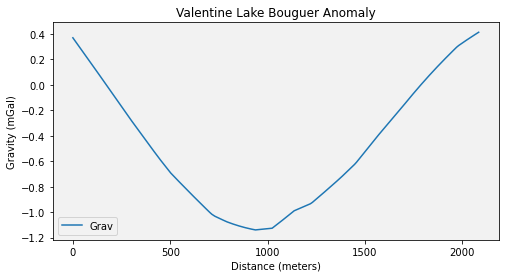

In [6]:
df = pd.read_csv('grav_ld.csv')

ax = df.plot(x="Distance", y="Grav", figsize=((8,4)), title='Valentine Lake Bouguer Anomaly')
ax.set_xlabel("Distance (meters)")
ax.set_ylabel("Gravity (mGal)")

## Sphere Comparisons



We will now play with the comparison of the Valentine Lake Bouguer anomaly profile and profiles calculated by two spheres.  Try to find two sets of parameters that give the same gravity anomaly as the Valentine Lake profile.  Note that the initial parameters are just the minimum of the range and so will give funny results.

In [8]:
%run GravityImports_Mike.py

interact(plot_two_sphere_profiles,
         x1 = widgets.IntSlider(min=-1,max=2000,step=20),
         z1 = widgets.IntSlider(min=-900,max=0,step=20,value=-100),
         srad1 = widgets.IntSlider(min=50,max=500,step=10),
         rho1 = widgets.IntSlider(min=-800,max=200,step=20),
         x2 = widgets.IntSlider(min=-1,max=2000,step=20),
         z2 = widgets.IntSlider(min=-900,max=0,step=20,value=-100),
         srad2 = widgets.IntSlider(min=50,max=500,step=10),
         rho2 = widgets.IntSlider(min=-800,max=200,step=20),
)


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=0, description='x1', max=2000, min=-1, step=20), IntSlider(value=-100, d…

<function __main__.plot_two_sphere_profiles(x1=900, z1=200.0, rho1=1000.0, srad1=200.0, x2=900, z2=-100, rho2=2000, srad2=100.0)>

## Compare a sphere and a cylinder

Now lets try and calculate the gravity profile for a cylinder and sphere so that they roughly match the Valentine Lake gravity profile.

In [8]:
interact(plot_sphere_cylinder_profiles,
         x1 = widgets.IntSlider(min=-1,max=1100,step=20),
         z1 = widgets.IntSlider(min=-900,max=0,step=20,value=-100),
         srad1 = widgets.IntSlider(min=50,max=500,step=10),
         rho1 = widgets.IntSlider(min=-800,max=200,step=20),
         x2 = widgets.IntSlider(min=-1100,max=1100,step=20),
         z2 = widgets.IntSlider(min=-900,max=0,step=20,value=-100),
         srad2 = widgets.IntSlider(min=50,max=500,step=10),
         rho2 = widgets.IntSlider(min=-800,max=200,step=20),
)

interactive(children=(IntSlider(value=0, description='x1', max=1100, min=-1, step=20), IntSlider(value=-100, d…

<function __main__.plot_sphere_cylinder_profiles(x1=900.0, z1=200.0, rho1=1000.0, srad1=200.0, x2=900.0, z2=-100, rho2=2000, srad2=100.0)>

## Now lets calculate gravity anomlies from 3 different geometries (sphere, cylinder, and a slab) that roughly match the same minimum gravity anomlay observed from the Valentine Lake profile.

In [10]:
interact(plot_sphere_cylinder_slab_profiles,
         x1 = widgets.IntSlider(min=-1,max=1300,step=20),
         z1 = widgets.IntSlider(min=-900,max=0,step=20,value=-100),
         srad1 = widgets.IntSlider(min=50,max=500,step=10),
         rho1 = widgets.IntSlider(min=-800,max=200,step=20),
         x2 = widgets.IntSlider(min=-1,max=1100,step=20),
         z2 = widgets.IntSlider(min=-900,max=0,step=20,value=-100),
         srad2 = widgets.IntSlider(min=50,max=500,step=10),
         rho2 = widgets.IntSlider(min=-800,max=200,step=20),
         x3 = widgets.IntSlider(min=-1,max=1300,step=20),
         z3 = widgets.IntSlider(min=-900,max=0,step=20,value=-100),
         t3 = widgets.IntSlider(min=50,max=900,step=10),
         rho3 = widgets.IntSlider(min=-800,max=200,step=20),

         
)

interactive(children=(IntSlider(value=0, description='x1', max=1300, min=-1, step=20), IntSlider(value=-100, d…

<function __main__.plot_sphere_cylinder_slab_profiles(x1=0.0, z1=200.0, rho1=1000.0, srad1=200.0, x2=20.0, z2=-100, rho2=2000, srad2=100.0, x3=0.0, z3=-200.0, t3=100.0, rho3=500.0)>